In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
import nlopt
from statsrat.expr.predef.pvl_no_iti import reinstatement
from exemplar_models import *
from plotnine import *

In [2]:
save_plots = True
model = null
print(model.pars)

par_vals = {'null': [2.0, 1.0, 5.0]}

            min   max  default
decay_rate  0.0  10.0      0.5
nu          0.0  10.0      0.0
resp_scale  0.0  10.0      1.0


reinstatement 



/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_reinstatement_b_null.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_reinstatement_u_ex_null.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_reinstatement_r_null.jpeg


0.023379380373576897
       schedule     trial_name u_name  mean_resp
0  experimental  cs -> nothing     us   0.908522
0       control  cs -> nothing     us   0.885143


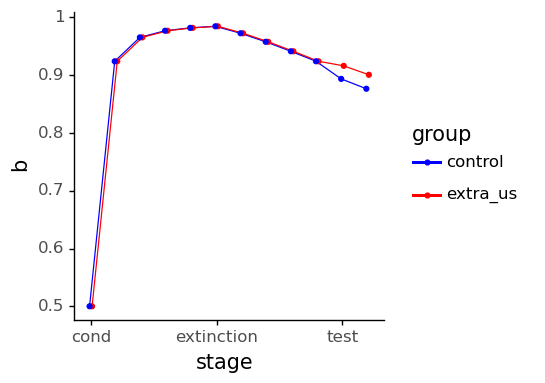

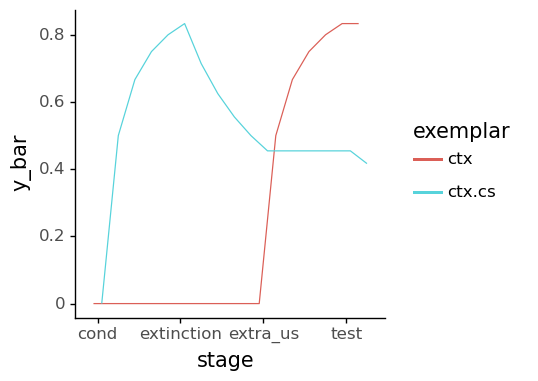

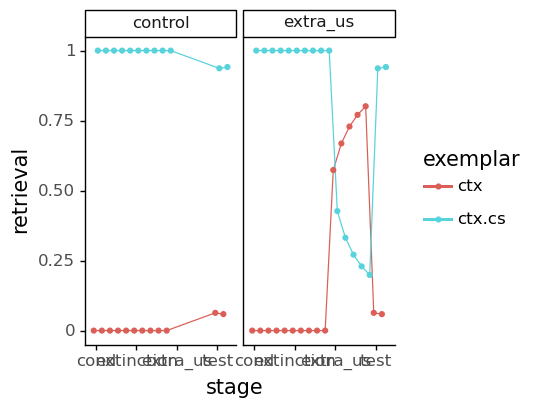

In [3]:
print('reinstatement \n')

trials = reinstatement.make_trials('experimental')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
ds_exp = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = reinstatement.make_trials('control')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
ds_ctl = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'control', 'experimental': 'extra_us'},
                       only_main = True,
                       draw_points = True,
                       dodge_width = 0.2,
                       sel = 2*[{'t': ds_exp['stage_name'].isin(['cond', 'extinction', 'test'])}])
plot_b += scale_color_manual(values = {'extra_us': 'red', 'control': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/exemplar_reinstatement_b_' + model.name + '.jpeg', dpi = 500)

plot_u_ex = sr.learn_plot(ds_exp,
                          var = 'u_ex',
                          rename_coords = {'ex_name': 'exemplar'},
                          only_main = False)
plot_u_ex += ylab('y_bar')
plot_u_ex.draw()
if save_plots:
    plot_u_ex.save(filename = 'plots/exemplar_reinstatement_u_ex_' + model.name + '.jpeg', dpi = 500)
    
plot_r = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'rtrv',
                       schedule_facet = True,
                       rename_coords = {'schedule': 'group', 'ex_name': 'exemplar'},
                       rename_schedules = {'control': 'control', 'experimental': 'extra_us'},
                       only_main = True,
                       draw_points = True)
plot_r += ylab('retrieval')
plot_r.draw()
if save_plots:
    plot_r.save(filename = 'plots/exemplar_reinstatement_r_' + model.name + '.jpeg', dpi = 500)

print(reinstatement.oats['reinstatement'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(reinstatement.oats['reinstatement'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))

In [4]:
#if model.name == 'grad_common':
#    sr.learn_plot(ds_exp, var = 'atn', color_var = 'x_name', sel = {'ex_name': ds_exp['ex_name'].values[0]}).draw()
#else:
#    sr.learn_plot(ds_exp, var = 'atn', color_var = 'x_name', facet_var = 'ex_name').draw()